In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image

In [16]:
original_img = np.array(Image.open('tree.jpg'), dtype=np.float64) / 255
original_img[:10]
original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img, (width * height, depth))

In [4]:
image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [9]:
cluster_assignments = estimator.predict(image_flattened)
cluster_assignments[0]

54

In [10]:
compressed_palette = estimator.cluster_centers_
compressed_palette
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1

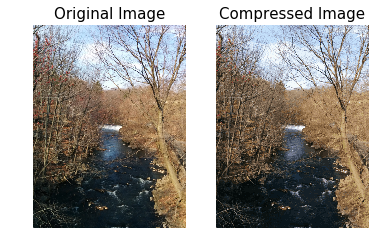

In [14]:
plt.subplot(121)
plt.title('Original Image', fontsize=15)
plt.imshow(original_img)
plt.axis('off')
plt.subplot(122)
plt.title('Compressed Image', fontsize=15)
plt.imshow(compressed_img)
plt.axis('off')
plt.show()